## TITANIC DATA SET

The titanic and titanic2 data frames describe the survival status of individual passengers
on the Titanic.

##  Problem statement.
We are given information about a subset of the Titanic population and asked to build a predictive model that tells us whether or not a given passenger survived the shipwreck.

## Dataset Information:
We are given 10 basic explanatory variables,
PassengerId - identification number of the passenger.

Survived - the passenger survived in the shipwreck.(0 = No; 1 = Yes)

Pclass - passenger class.(1 = 1st; 2 = 2nd; 3 = 3rd)

Name  - passenger name.

Sex - passenger gender .

Age - passenger age.   

SibSp  -  number of siblings/ spouses aboard.

Parch  - number of parents/ children aboard.

Ticket  - Ticket Number. 

Fare    - Passenger Fare. 

Cabin   -  Cabin .

Embarked  - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)    

## SPECIAL NOTES
- Pclass is a proxy for socio-economic status (SES)
1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower

- Age is in Years; Fractional if Age less than One (1)

- Fare is in Pre-1970 British Pounds ()

With respect to the family relation variables (i.e. sibsp and parch) some relations were
ignored. The following are the definitions used for sibsp and parch.
- Sibling: Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic.
- Spouse: Husband or Wife of Passenger Aboard Titanic (Mistresses and FiancesIgnored).
- Parent: Mother or Father of Passenger Aboard Titanic.
- Child: Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic.

## Importing Libraries

In [3]:
# Basics libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

 ## Algorithm used to build the model

In [4]:
from sklearn.model_selection import train_test_split   # to perfom train test split
from sklearn.linear_model import LinearRegression      
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [5]:
# Model Evaluation

from sklearn.metrics import mean_squared_error, r2_score

# For scaling my data  -- 
from sklearn.preprocessing import StandardScaler

## Load the Dataset

In [7]:
train = pd.read_csv( 'titanic train data.csv')
test = pd.read_csv( 'titanic test data.csv')

In [8]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


 ## EDA [Exploratory Data Analysis]
- Training Dataset
- Checking for Null values

In [12]:
all = pd.concat([train, test], sort = False)
all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


- Mean-It is preferred if data is numeric and not skewed.
- Median-It is preferred if data is numeric and skewed.
- Mode-It is preferred if the data is a string(object) or nume

In [20]:
#Fill Missing numbers with median
all['Age'] = all['Age'].fillna(value=all['Age'].median())
all['Fare'] = all['Fare'].fillna(value=all['Fare'].median())

#### Filling the missing values using median.

In [21]:
all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1309 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


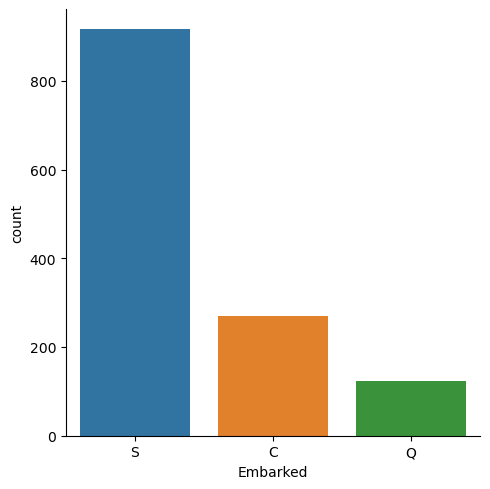

In [22]:
sns.catplot(x = 'Embarked', kind = 'count', data = all) #or all['Embarked'].value_counts()

### It is observed that the most Port of Embarkation is in southampton so lets fill the null values in embarked column with s (S = Southampton) 

In [23]:
all['Embarked'] = all['Embarked'].fillna('S')
all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1309 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


#### There are 177 nulls for Age lets treat the missing null values 

In [24]:
#Age
all.loc[ all['Age'] <= 16, 'Age'] = 0
all.loc[(all['Age'] > 16) & (all['Age'] <= 32), 'Age'] = 1
all.loc[(all['Age'] > 32) & (all['Age'] <= 48), 'Age'] = 2
all.loc[(all['Age'] > 48) & (all['Age'] <= 64), 'Age'] = 3
all.loc[ all['Age'] > 64, 'Age'] = 4 

In [25]:
#Title
import re
def get_title(name):
    title_search = re.search(' ([A-Za-z]+\.)', name)
    
    if title_search:
        return title_search.group(1)
    return ""

In [26]:
all['Title'] = all['Name'].apply(get_title)
all['Title'].value_counts()

Mr.          757
Miss.        260
Mrs.         197
Master.       61
Rev.           8
Dr.            8
Col.           4
Mlle.          2
Major.         2
Ms.            2
Lady.          1
Sir.           1
Mme.           1
Don.           1
Capt.          1
Countess.      1
Jonkheer.      1
Dona.          1
Name: Title, dtype: int64

In [27]:
all['Title'] = all['Title'].replace(['Capt.', 'Dr.', 'Major.', 'Rev.'], 'Officer.')
all['Title'] = all['Title'].replace(['Lady.', 'Countess.', 'Don.', 'Sir.', 'Jonkheer.', 'Dona.'], 'Royal.')
all['Title'] = all['Title'].replace(['Mlle.', 'Ms.'], 'Miss.')
all['Title'] = all['Title'].replace(['Mme.'], 'Mrs.')
all['Title'].value_counts()

Mr.         757
Miss.       264
Mrs.        198
Master.      61
Officer.     19
Royal.        6
Col.          4
Name: Title, dtype: int64

In [28]:
#Cabin
all['Cabin'] = all['Cabin'].fillna('Missing')
all['Cabin'] = all['Cabin'].str[0]
all['Cabin'].value_counts()

M    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: Cabin, dtype: int64

In [29]:
all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        1309 non-null   object 
 11  Embarked     1309 non-null   object 
 12  Title        1309 non-null   object 
dtypes: float64(3), int64(4), object(6)
memory usage: 143.2+ KB


In [30]:
#Family Size & Alone 
all['Family_Size'] = all['SibSp'] + all['Parch'] + 1
all['IsAlone'] = 0
all.loc[all['Family_Size']==1, 'IsAlone'] = 1
all.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family_Size,IsAlone
0,1,0.0,3,"Braund, Mr. Owen Harris",male,1.0,1,0,A/5 21171,7.2500,M,S,Mr.,2,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,2.0,1,0,PC 17599,71.2833,C,C,Mrs.,2,0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,1.0,0,0,STON/O2. 3101282,7.9250,M,S,Miss.,1,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,2.0,1,0,113803,53.1000,C,S,Mrs.,2,0
4,5,0.0,3,"Allen, Mr. William Henry",male,2.0,0,0,373450,8.0500,M,S,Mr.,1,1


In [31]:
all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        1309 non-null   object 
 11  Embarked     1309 non-null   object 
 12  Title        1309 non-null   object 
 13  Family_Size  1309 non-null   int64  
 14  IsAlone      1309 non-null   int64  
dtypes: float64(3), int64(6), object(6)
memory usage: 163.6+ KB


In [32]:
#Drop unwanted variables
all_1 = all.drop(['Name', 'Ticket'], axis = 1)
all_1.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,Family_Size,IsAlone
0,1,0.0,3,male,1.0,1,0,7.2500,M,S,Mr.,2,0
1,2,1.0,1,female,2.0,1,0,71.2833,C,C,Mrs.,2,0
2,3,1.0,3,female,1.0,0,0,7.9250,M,S,Miss.,1,1
3,4,1.0,1,female,2.0,1,0,53.1000,C,S,Mrs.,2,0
4,5,0.0,3,male,2.0,0,0,8.0500,M,S,Mr.,1,1


In [33]:
all_dummies = pd.get_dummies(all_1)
all_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     1309 non-null   int64  
 1   Survived        891 non-null    float64
 2   Pclass          1309 non-null   int64  
 3   Age             1309 non-null   float64
 4   SibSp           1309 non-null   int64  
 5   Parch           1309 non-null   int64  
 6   Fare            1309 non-null   float64
 7   Family_Size     1309 non-null   int64  
 8   IsAlone         1309 non-null   int64  
 9   Sex_female      1309 non-null   uint8  
 10  Sex_male        1309 non-null   uint8  
 11  Cabin_A         1309 non-null   uint8  
 12  Cabin_B         1309 non-null   uint8  
 13  Cabin_C         1309 non-null   uint8  
 14  Cabin_D         1309 non-null   uint8  
 15  Cabin_E         1309 non-null   uint8  
 16  Cabin_F         1309 non-null   uint8  
 17  Cabin_G         1309 non-null   ui

In [34]:
all_train = all_dummies[all_dummies['Survived'].notna()]
all_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     891 non-null    int64  
 1   Survived        891 non-null    float64
 2   Pclass          891 non-null    int64  
 3   Age             891 non-null    float64
 4   SibSp           891 non-null    int64  
 5   Parch           891 non-null    int64  
 6   Fare            891 non-null    float64
 7   Family_Size     891 non-null    int64  
 8   IsAlone         891 non-null    int64  
 9   Sex_female      891 non-null    uint8  
 10  Sex_male        891 non-null    uint8  
 11  Cabin_A         891 non-null    uint8  
 12  Cabin_B         891 non-null    uint8  
 13  Cabin_C         891 non-null    uint8  
 14  Cabin_D         891 non-null    uint8  
 15  Cabin_E         891 non-null    uint8  
 16  Cabin_F         891 non-null    uint8  
 17  Cabin_G         891 non-null    uin

In [35]:
all_test = all_dummies[all_dummies['Survived'].isna()]
all_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     418 non-null    int64  
 1   Survived        0 non-null      float64
 2   Pclass          418 non-null    int64  
 3   Age             418 non-null    float64
 4   SibSp           418 non-null    int64  
 5   Parch           418 non-null    int64  
 6   Fare            418 non-null    float64
 7   Family_Size     418 non-null    int64  
 8   IsAlone         418 non-null    int64  
 9   Sex_female      418 non-null    uint8  
 10  Sex_male        418 non-null    uint8  
 11  Cabin_A         418 non-null    uint8  
 12  Cabin_B         418 non-null    uint8  
 13  Cabin_C         418 non-null    uint8  
 14  Cabin_D         418 non-null    uint8  
 15  Cabin_E         418 non-null    uint8  
 16  Cabin_F         418 non-null    uint8  
 17  Cabin_G         418 non-null    uin

## Train/Test Split

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(all_train.drop(['PassengerId','Survived'],axis=1), 
                                                    all_train['Survived'], test_size=0.30, 
                                                    random_state=101)

In [37]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

In [38]:
mse_train = mean_squared_error(y_train,y_train_pred)

In [39]:
mse_test = mean_squared_error(y_test,y_test_pred)

In [40]:
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

In [41]:
print('rmse_train = ',rmse_train)
print('rmse_test = ',rmse_test)

rmse_train =  0.3521377734923786
rmse_test =  0.3813538845502176


In [42]:
r2_score(y_train,y_train_pred)

0.46559639573271194

In [43]:
r2_score(y_test,y_test_pred)

0.4050227431860959

In [44]:
DM = DecisionTreeRegressor()
DM.fit(X_train,y_train)
y_train_pred = DM.predict(X_train)
y_test_pred = DM.predict(X_test)
mse_train = mean_squared_error(y_train,y_train_pred)
mse_test = mean_squared_error(y_test,y_test_pred)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
print('rmse_train = ',rmse_train)
print('rmse_test = ',rmse_test)
train_score = r2_score(y_train,y_train_pred)
test_score = r2_score(y_test,y_test_pred)
print('train_score = ',train_score)
print('test_score = ',test_score)

rmse_train =  0.176596716658985
rmse_test =  0.44879000771892363
train_score =  0.8655968645845002
test_score =  0.17599400096033702


In [45]:
RF = RandomForestRegressor()
RF.fit(X_train,y_train)
y_train_pred = RF.predict(X_train)
y_test_pred = RF.predict(X_test)
mse_train = mean_squared_error(y_train,y_train_pred)
mse_test = mean_squared_error(y_test,y_test_pred)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
print('rmse_train = ',rmse_train)
print('rmse_test = ',rmse_test)
train_score = r2_score(y_train,y_train_pred)
test_score = r2_score(y_test,y_test_pred)
print('train_score = ',train_score)
print('test_score = ',test_score)

rmse_train =  0.20924856104955045
rmse_test =  0.3768700532404027
train_score =  0.8113012118944465
test_score =  0.4189315787422334


In [46]:
RF.fit(X_train, y_train)

RandomForestRegressor()

In [47]:
predictions = RF.predict(X_test)
predictions

array([0.21      , 0.94      , 0.63      , 0.91666667, 0.05166667,
       0.        , 0.21666667, 0.        , 0.99      , 0.81571429,
       0.05166667, 0.3286241 , 0.96      , 0.        , 0.02      ,
       0.56      , 0.6625    , 0.17744192, 0.12      , 0.88      ,
       0.        , 0.77      , 0.90055808, 0.59      , 0.        ,
       0.3775    , 0.1075    , 0.01      , 0.15      , 0.        ,
       0.60566667, 0.71      , 0.74416414, 0.60061111, 0.03      ,
       1.        , 0.        , 0.        , 0.03      , 0.52      ,
       0.14      , 0.646     , 1.        , 0.05246002, 0.        ,
       0.45366667, 0.30064286, 0.51333333, 0.005     , 0.05166667,
       0.85464286, 0.34      , 0.97666667, 0.94333333, 0.74416414,
       0.01      , 0.        , 0.        , 0.04      , 0.95      ,
       0.99      , 0.        , 0.        , 0.47033333, 0.        ,
       0.17524199, 0.82453968, 0.227     , 0.88      , 0.48983883,
       0.21      , 0.11088943, 0.        , 0.01      , 0.092  

## Check Accuracy

In [48]:
print(f'Test : {RF.score(X_test, y_test):.3f}')
print(f'Train : {RF.score(X_train, y_train):.3f}')

Test : 0.436
Train : 0.811


## Final Predictions

In [49]:
all_test.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Family_Size,IsAlone,Sex_female,...,Embarked_C,Embarked_Q,Embarked_S,Title_Col.,Title_Master.,Title_Miss.,Title_Mr.,Title_Mrs.,Title_Officer.,Title_Royal.
0,892,NaN,3,2.0,0,0,7.8292,1,1,0,...,0,1,0,0,0,0,1,0,0,0
1,893,NaN,3,2.0,1,0,7.0000,2,0,1,...,0,0,1,0,0,0,0,1,0,0
2,894,NaN,2,3.0,0,0,9.6875,1,1,0,...,0,1,0,0,0,0,1,0,0,0
3,895,NaN,3,1.0,0,0,8.6625,1,1,0,...,0,0,1,0,0,0,1,0,0,0
4,896,NaN,3,1.0,1,1,12.2875,3,0,1,...,0,0,1,0,0,0,0,1,0,0


In [50]:
TestForPred = all_test.drop(['PassengerId', 'Survived'], axis = 1)

In [51]:
t_pred = RF.predict(TestForPred).astype(int)

In [52]:
PassengerId = all_test['PassengerId']

In [53]:
RF_Sub = pd.DataFrame({'PassengerId': PassengerId, 'Survived':t_pred })
RF_Sub.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [54]:
RF_Sub.to_csv("RF_Class_Submission.csv", index = False)